## AIML CA1 PART B - REGRESSION
Objective / Background Information : <b>housing_dataset.csv</b> is a dataset to predict the housing price in US based on various factors such as city, house area, No. of bedrooms and toilets, renovation status, etc.  

### IMPORTING DATASETS

1. Import numpy, pandas, matplotlib, seaborn and sklearn modules
2. Read the csv data file 'housing_dataset.csv' using pd.read_csv

In [12]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import the sklearn libraries
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, mean_squared_log_error
from sklearn.linear_model import Lasso, LinearRegression, Ridge, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.inspection import permutation_importance
import time

# Load the dataset using pandas
housing_df = pd.read_csv('Datasets/housing_dataset.csv')

### DEFINING THE PREDICTION TASK AND OUTPUT VARIABLE
Prediction Task : To build a regression model that will predict the housing price in US based on various factors such as City, House Area, No. of Bedrooms and Toilets, Renovation Status, etc.  

Output Variable : 'Price ($)' ( Numerical Variable )

- The output variable represents the predicted or estimated price of a house based on the given input features.

### OVERVIEW OF THE HOUSING DATASET
1. To summarise the individual datasets, use pandas functions .info() to get summarized information of the dataset.
2. Use panda function .head() to display the first 5 rows of the dataset.

In [2]:
# Viewing of the housing_dataset.csv
print("Overview and Summary of HOUSING_DATASET.CSV : \n")
print(housing_df.info())
# Print the first 5 rows of the housing dataset
housing_df.head()

Overview and Summary of HOUSING_DATASET.CSV : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   House ID           545 non-null    int64  
 1   City               545 non-null    object 
 2   House Area (sqm)   545 non-null    float64
 3   No. of Bedrooms    545 non-null    int64  
 4   No. of Toilets     545 non-null    int64  
 5   Stories            545 non-null    int64  
 6   Renovation Status  545 non-null    object 
 7   Price ($)          545 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 34.2+ KB
None


,House ID,City,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Renovation Status,Price ($)
0,0,Chicago,742.0,4,2,3,furnished,1330000
1,1,Denver,896.0,4,4,4,furnished,1225000
2,2,Chicago,996.0,3,2,2,semi-furnished,1225000
3,3,Seattle,750.0,4,2,2,furnished,1221500
4,4,New York,742.0,4,1,2,furnished,1141000


### DESCRIBING THE INFORMATION OF THE HOUSING DATASET
- Determine the number of rows and columns in the dataset : use shape[0] for rows and shape[1] for columns.

- Identify the datatype and number of non-null values : use .info() to summarise information on the dataset.

- Ensure the dataset does not contain NA values : use .isnull().sum() to sum the NA values by column (if any). If values are returned as 0, it indicates that there are no NA values.

- Retrieve the number of unique values for each column in the dataset using nunique().

In [3]:
# Information of the dataset

# Extracting the rows and columns of the dataset
print(f"\nThere are {housing_df.shape[0]} rows and {housing_df.shape[1]} columns in the housing_df dataset.\n")

# Check for any missing values
print(f"Checking for missing or na values in the dataset:\n---------------------------\n{housing_df.isnull().sum()}")

# Extract the unique values from each column of the dataset
print(f"\nCount of unique values in the dataset columns:\n---------------------------\n{housing_df.nunique()}")

# Describing the dataset
print(f"\nSummarising the numerical values in the dataset:\n---------------------------\n{housing_df.drop(columns=['City', 'Renovation Status']).describe()}")


There are 545 rows and 8 columns in the housing_df dataset.

Checking for missing or na values in the dataset:
---------------------------
House ID             0
City                 0
House Area (sqm)     0
No. of Bedrooms      0
No. of Toilets       0
Stories              0
Renovation Status    0
Price ($)            0
dtype: int64

Count of unique values in the dataset columns:
---------------------------
House ID             545
City                   5
House Area (sqm)     284
No. of Bedrooms        6
No. of Toilets         4
Stories                4
Renovation Status      3
Price ($)            219
dtype: int64

Summarising the numerical values in the dataset:
---------------------------
        House ID  House Area (sqm)  No. of Bedrooms  No. of Toilets  \
count  545.00000        545.000000       545.000000      545.000000   
mean   272.00000        515.054128         2.965138        1.286239   
std    157.47222        217.014102         0.738064        0.502470   
min      0.0

### EXPLORATORY DATA ANALYSIS
### GRAPH 1 : INVESTIGATING THE HOUSE AREA VS PRICE BY CITY

- There are notable price disparities among the cities. Chicago generally has higher house prices compared to the other cities, while Seattle and Denver appear to have relatively lower prices for a given house area.


- The slopes of the regression lines indicate varying degrees of price sensitivity to house area. Seattle and Denver tend to offer relatively more affordable housing options compared to Chicago, New York, and Boston, which tend to offer more luxury homes.


- There is a strong linear relationship between house area (sqm) and price ($), indicating that price increases as the area of the house in square meters increases.

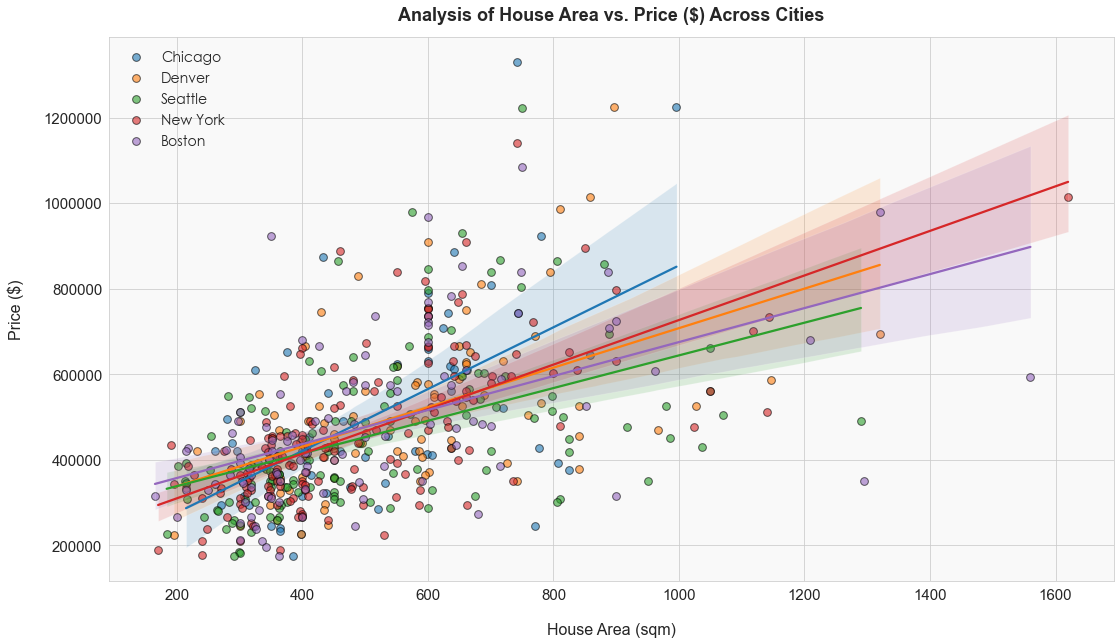

In [4]:
# Graph 1 : Investigating the House Area vs. Price by City

# Create scatter plots with regression lines for each city
cities = housing_df['City'].unique()

plt.figure(figsize=(18, 10))
sns.set_style('whitegrid')
plt.gca().set_facecolor('#F9F9F9')
plt.rcParams['font.family'] = 'Century Gothic'
plt.ticklabel_format(style='plain')

for i, city in enumerate(cities):
    sns.regplot(x='House Area (sqm)', y='Price ($)', data=housing_df[housing_df['City'] == city], label=city, 
                scatter_kws={'s': 60, 'alpha': 0.6, 'edgecolor': 'black'})

plt.title('Analysis of House Area vs. Price ($) Across Cities', fontsize=18, fontweight='bold', y=1.02)
plt.xlabel('House Area (sqm)', fontsize=16, labelpad=20)
plt.ylabel('Price ($)', fontsize=16, labelpad=20)
plt.legend(loc='upper left', frameon=False, fontsize=14)

# Set font properties for ticks
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Display the plot
plt.show()

### GRAPH 2 : ANALYZING THE PRICE DISTRIBUTION OF HOUSES BY RENOVATION STATUS

- The swarm plots reveal that semi-furnished homes generally exhibited the widest horizontal spread, suggesting that valuations of semi-furnished homes are roughly kept the same from 400,000 to 500,000.


- In the case of furnished homes, the price range spans from 190,000 to 1,380,000, reflecting differences in furniture quality, features, and potential customization options that may incur extra expenses.


- In contrast, unfurnished homes generally conform to a standardized market, offering basic structure and amenities. This objective valuation contributes to a narrower price spread for this category.


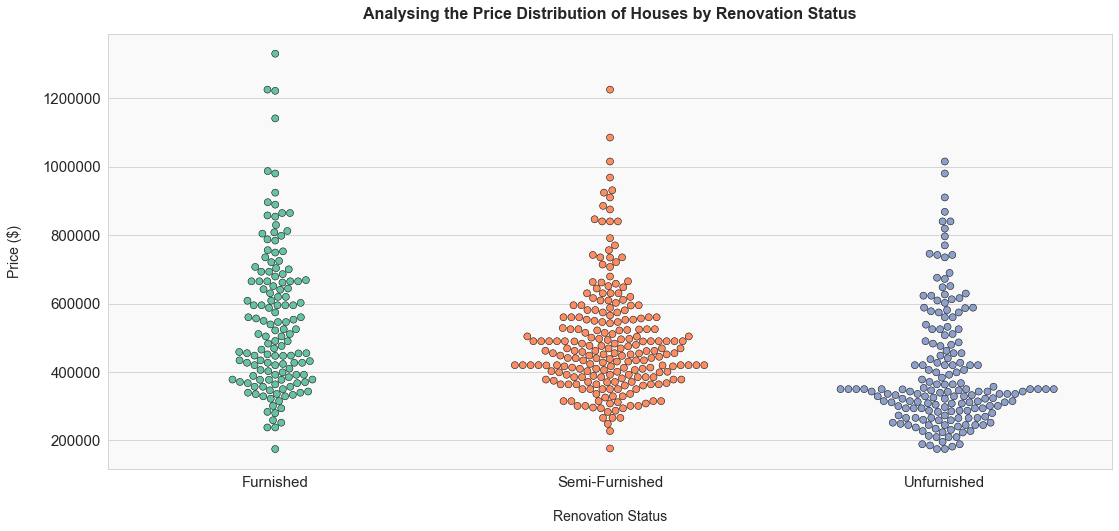

In [5]:
# Graph 2 : Analysing the Price Distribution of Houses by Renovation Status

# Setting the size of the figure
plt.figure(figsize=(18, 8))

# Customise the plot
sns.set_style('whitegrid')
plt.gca().set_facecolor('#F9F9F9')
plt.rcParams['font.family'] = 'Century Gothic'
plt.ticklabel_format(style='plain')

# Plotting the swarmplot
sns.swarmplot(x='Renovation Status', y='Price ($)', data = housing_df, size=7, edgecolor='black', linewidth=0.5, palette='Set2')
plt.title('Analysing the Price Distribution of Houses by Renovation Status', fontsize=16, fontweight='bold', y=1.02)
plt.xlabel('Renovation Status', fontsize=14, labelpad=20)
plt.ylabel('Price ($)', fontsize=14, labelpad=20)

# Set font properties for ticks
plt.xticks(fontsize=15, ticks=[0, 1, 2], labels=['Furnished', 'Semi-Furnished', 'Unfurnished'])
plt.yticks(fontsize=15)

plt.show()

### GRAPH 3 : INVESTIGATING THE GENERAL DISTRIBUTION OF HOUSING PRICES

- The histogram shows that distribution of housing prices across the 5 cities are skewed to the right, indicating that majority of houses in the dataset are affordable, with fewer properties in the high-price range.


- There is also a concentration of housing prices between 350000 and 600000, potentially indicating that there is a higher demand for houses in this price segment with increased competition.


- The skewness indicates that the distribution of prices is not normalized, and there are properties with extreme high values, that imbalances the price distribution.

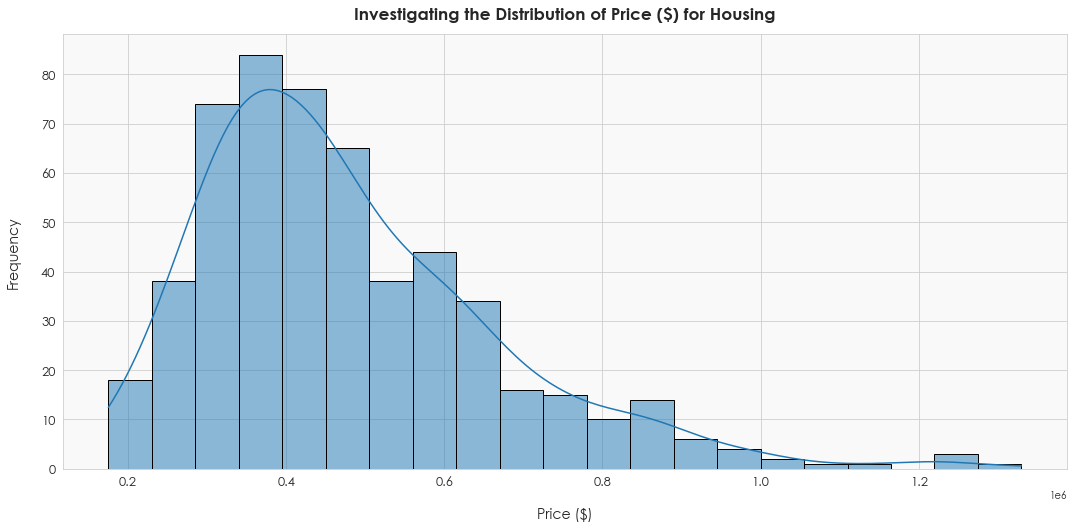

In [6]:
# Graph 3 : Investigating the Correlation Between Housing Features

# Set the figure size and customise the plot
plt.figure(figsize=(18, 8))
plt.rcParams['font.family'] = 'Century Gothic'

# Plot the distribution curve
sns.histplot(housing_df['Price ($)'], kde=True, edgecolor='black')

# Set the plot title and labels
plt.title('Investigating the Distribution of Price ($) for Housing', y=1.02, fontsize=17, fontweight='bold')
plt.xlabel('Price ($)', labelpad=20, fontsize=14)
plt.ylabel('Frequency', labelpad=20, fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.gca().set_facecolor('#F9F9F9')

# Show the plot
plt.show()

### FEATURE  PROCESSING AND REPRESENTATION OF DATA
- To process and represent the features, first drop the rows of outliers found in the dataset and reset the index of the revised dataset.


- Drop unused / unnecessary columns from the dataset, such as 'House ID', which would not be helpful in the regression evaluation.


- Use pandas to create dummy variables for categorical variables in the dataset, using the pandas 'get_dummies()' function , representing them as binary variables (0 or 1) for model training.


- Rename the columns created from the dummy variables using a dictionary and display the corrected dataset upon performing feature representation.

In [8]:
# Feature Representation of the Dataset

# Create a copy of the original dataset
housing_df_final = housing_df.copy()

# Drop unnecessary columns from the dataset
housing_df_final.drop('House ID', axis=1, inplace=True)

# Using pandas function get_dummies for categorical variable conversion
categorical_vars = ['City', 'Renovation Status']
housing_df_final = pd.get_dummies(housing_df_final, columns=categorical_vars, drop_first = True)

# Rename the columns to ensure standardisation in capitalisation
column_rename = {
    'Renovation Status_furnished': 'Renovation Status_Furnished',
    'Renovation Status_semi-furnished': 'Renovation Status_Semi-Furnished',
    'Renovation Status_unfurnished': 'Renovation Status_Unfurnished'
}

# Rename the columns using the mapping dictionary
housing_df_final = housing_df_final.rename(columns=column_rename)

# Displaying first 5 and last 5 rows of the modified dataset
print("HOUSING_DF Dataset After Performing Categorical Encoding :")
housing_df_final.head()

HOUSING_DF Dataset After Performing Categorical Encoding :


,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Price ($),City_Chicago,City_Denver,City_New York,City_Seattle,Renovation Status_Semi-Furnished,Renovation Status_Unfurnished
0,742.0,4,2,3,1330000,1,0,0,0,0,0
1,896.0,4,4,4,1225000,0,1,0,0,0,0
2,996.0,3,2,2,1225000,1,0,0,0,1,0
3,750.0,4,2,2,1221500,0,0,0,1,0,0
4,742.0,4,1,2,1141000,0,0,1,0,0,0


### SPLITTING THE DATA FOR TRAINING AND TESTING
1. Splitting the Data

- The dataset is divided into two components: features (X) and the target variable (y), which is essential for training and testing the model accurately.
- The features (X) are obtained by excluding the 'Price' column from the housing_df_final DataFrame, using the drop function with the axis parameter being set to 1.
- The target variable (y) is extracted from the housing_df_final DataFrame, specifically the Price column. Use np.log() for the target variable to ensure normality.

2. Splitting into Training and Testing Sets

- The function splits the data into four sets: X_train (features for training), X_test (features for testing), y_train (target variable for training), and y_test (target variable for testing). The test_size parameter of 0.3 specifies the proportion of the data to be allocated for testing of the data. 

In [241]:
# Splitting the Data for Model

# Split the data into features (X) and the target variable (y)
X = housing_df_final.drop(['Price ($)'], axis = 1)
y = np.log(housing_df_final['Price ($)']) # Apply np.log() to ensure normality on the Price($)
print("Dimensions of the DataFrame:")
print(X.shape, y.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 21)

Dimensions of the DataFrame:
(545, 10) (545,)


### SCALING AND NORMALIZING NUMERICAL FEATURES
- For X_train data, scale and fit_transform using RobustScaler().
- For X_test data, scale and transform using RobustScaler().
- RobustScaler() is used due to outliers found in the Price column, and this scaler is less sensitive to outliers, enabling it to be less influenced by extreme values, as well as preserve the shape of distribution provided by the data, leading to a more accurate scale of values provided.

In [242]:
# Normalizing the numerical features

# Use RobustScaler to scale the training data
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Displaying transformed data
print(f"Scaled Training Data : \n\n{X_train_scaled}")
print(f"\nScaled Test Data : \n\n{X_test}")

Scaled Training Data : 

[[-0.14981273  0.          0.         ...  0.          0.
   0.        ]
 [-0.4082397   0.          0.         ...  0.          1.
   0.        ]
 [ 0.52434457  1.          0.         ...  0.          0.
   1.        ]
 ...
 [ 0.38951311 -1.          0.         ...  0.          1.
   0.        ]
 [-0.11235955  0.          1.         ...  0.          0.
   1.        ]
 [-0.59925094  0.          0.         ...  0.          1.
   0.        ]]

Scaled Test Data : 

[[ 0.33707865  0.          1.         ...  0.          1.
   0.        ]
 [ 0.54681648 -1.          0.         ...  0.          1.
   0.        ]
 [ 0.8988764   0.          1.         ...  0.          0.
   0.        ]
 ...
 [-0.2247191   1.          1.         ...  0.          1.
   0.        ]
 [-0.28089888  0.          0.         ...  0.          0.
   1.        ]
 [ 0.74906367  0.          0.         ...  0.          0.
   0.        ]]


### CROSS-VALIDATION OF REGRESSION MODELS

- Compare the performance of different regressors using cross-validation where cv = 6.
- Obtain the median MAPE (Mean Absolute Percentage Error) and RMSE (Root Mean Squared Error) score for each model and plot them using boxplots.
- The lower the MAPE and RMSE scores, the better the model for regression.

Cross-Validation Scores for Each Model :

- MAPE Scores :
1. Random Forest Median Cross-Validation MAPE: 0.0162
2. Linear Regression Median Cross-Validation MAPE: 0.0154
3. Ridge Median Cross-Validation MAPE: 0.0154
4. Gradient Boosting Median Cross-Validation MAPE: 0.0162
5. K-Nearest Neighbors Median Cross-Validation MAPE: 0.0169
6. Lasso Median Cross-Validation MAPE: 0.0229
7. Decision Tree Median Cross-Validation MAPE: 0.0206

- RMSE Scores :
1. Random Forest Median Cross-Validation RMSE: 0.2717
2. Linear Regression Median Cross-Validation RMSE: 0.2548
3. Ridge Median Cross-Validation RMSE: 0.2548
4. Gradient Boosting Median Cross-Validation RMSE: 0.2735
5. K-Nearest Neighbors Median Cross-Validation RMSE: 0.2909
6. Lasso Median Cross-Validation RMSE: 0.3697
7. Decision Tree Median Cross-Validation RMSE: 0.3494

- From the cross-validation, the best models are Linear Regression and Ridge, but Random Forest is also performing almost as well as the two models. Hence, we will use the top 3 models from cross-validation for hyperparameter tuning.

Cross-Validation Scores:

Random Forest Median Cross-Validation MAPE: 0.0162
Random Forest Median Cross-Validation RMSE: 0.2717

Linear Regression Median Cross-Validation MAPE: 0.0154
Linear Regression Median Cross-Validation RMSE: 0.2548

Ridge Median Cross-Validation MAPE: 0.0154
Ridge Median Cross-Validation RMSE: 0.2548

Gradient Boosting Median Cross-Validation MAPE: 0.0162
Gradient Boosting Median Cross-Validation RMSE: 0.2735

KNN Median Cross-Validation MAPE: 0.0169
KNN Median Cross-Validation RMSE: 0.2909

Lasso Median Cross-Validation MAPE: 0.0229
Lasso Median Cross-Validation RMSE: 0.3697

Decision Tree Median Cross-Validation MAPE: 0.0206
Decision Tree Median Cross-Validation RMSE: 0.3494


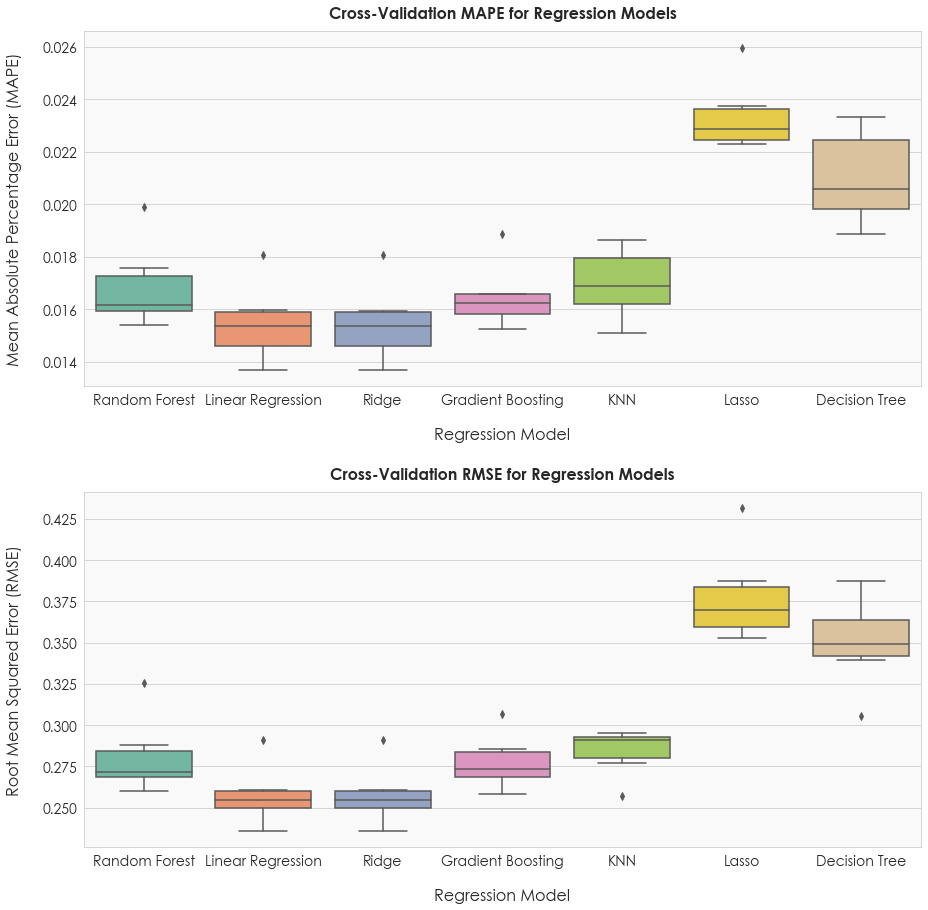

In [243]:
# Initialize the regression models
regressors = {
    'Random Forest': RandomForestRegressor(random_state=21),
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=0.1),
    'Gradient Boosting': GradientBoostingRegressor(random_state=21),
    'KNN': KNeighborsRegressor(),
    'Lasso': Lasso(random_state=21),
    'Decision Tree': DecisionTreeRegressor(random_state=21)
}

# Perform cross-validation and collect scores for each regressor
cv_scores_mape = {}
cv_scores_rmse = {}
print("Cross-Validation Scores:")
for reg_name, regressor in regressors.items():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    scores_mape = cross_val_score(regressor, X_train_scaled, y_train, cv=kf, scoring='neg_mean_absolute_percentage_error')
    scores_rmse = cross_val_score(regressor, X_train_scaled, y_train, cv=kf, scoring='neg_root_mean_squared_error')
    cv_scores_mape[reg_name] = -scores_mape  # Negate the scores to get positive MAPE
    cv_scores_rmse[reg_name] = -scores_rmse  # Negate the scores to get positive RMSE
    print(f"\n{reg_name} Median Cross-Validation MAPE:", round(np.median(-scores_mape), 4))
    print(f"{reg_name} Median Cross-Validation RMSE:", round(np.median(-scores_rmse), 4))

# Set the style and font for the plot
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Century Gothic'

# Convert the cv_scores dictionaries to DataFrames
df_scores_mape = pd.DataFrame(cv_scores_mape)
df_scores_rmse = pd.DataFrame(cv_scores_rmse)

# Create subplots for MAPE and RMSE boxplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 15))
fig.subplots_adjust(hspace=0.3)

# Plotting the MAPE boxplot with median values
sns.boxplot(data=df_scores_mape, ax=ax1, palette='Set2')
ax1.set_facecolor('#F9F9F9')
ax1.set_xlabel('Regression Model', fontsize=16, labelpad=20)
ax1.set_ylabel('Mean Absolute Percentage Error (MAPE)', fontsize=16, labelpad=20)
ax1.set_title('Cross-Validation MAPE for Regression Models', fontsize=16, fontweight='bold', y=1.02)
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)

# Plotting the RMSE boxplot with median values
sns.boxplot(data=df_scores_rmse, ax=ax2, palette='Set2')
ax2.set_facecolor('#F9F9F9')
ax2.set_xlabel('Regression Model', fontsize=16, labelpad=20)
ax2.set_ylabel('Root Mean Squared Error (RMSE)', fontsize=16, labelpad=20)
ax2.set_title('Cross-Validation RMSE for Regression Models', fontsize=16, fontweight='bold', y=1.02)
ax2.tick_params(axis='x', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)

plt.show()

### EVALUATING RANDOM FOREST, LINEAR REGRESSION AND RIDGE MODELS

- Create a param_grid to finetune and improve the algorithm for the top 3 regressors.
- Perform GridSearchCV to extensively search for the best parameters that can provide the best scores and set cv = 5 to create 5 folds of data to train.
- Fit the best parameters to the model for training.
- Based on the 3 regressors, Random Forest Regressor is the best-performing model.



### RIDGE REGRESSOR
Parameters in the Param Grid :
- alpha : Regularization strength to prevent overfitting

- solver : Type of algorithm used to solve the optimization problem

- max_iter : Maximum number of iterations performed for the solver to find the optimal solution

In [256]:
# Testing and Finetuning the model : Ridge Regressor

# Define the parameter grid 
param_grid = {
    'alpha': [0.1, 1.0, 10.0],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
    'max_iter':[100, 1000]
}

# Perform grid search cross-validation
ridge_tuned = Ridge()
ridge_tuned = GridSearchCV(ridge_tuned, param_grid=param_grid, cv=5)

# Fit the grid search to the training data
ridge_tuned.fit(X_train_scaled, y_train)

# Retrieve the best parameters and score from the grid search
best_params = ridge_tuned.best_params_
best_score = ridge_tuned.best_score_

print("Best Parameters:", best_params)
print("\nBest Score:", best_score)
print("\n", ridge_tuned.get_params())

# Refitting Using Tuned Ridge Regression

# Make predictions and expectations on the test set
y_pred = ridge_tuned.predict(X_test)
rr_expected = np.exp(y_test)
rr_predicted = np.exp(y_pred)

# Evaluate the model
mse = mean_squared_error(rr_expected, rr_predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(rr_expected, rr_predicted)
r2 = r2_score(rr_expected, rr_predicted)
evs = explained_variance_score(rr_expected, rr_predicted)

# Print the evaluation metrics
print("\nRegression Model Evaluation Metrics:")
print("-----------------------------------")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared Coefficient: {r2:.2f}")
print(f"Explained Variance Score: {evs:.2f}")

Best Parameters: {'alpha': 10.0, 'max_iter': 100, 'solver': 'sag'}

Best Score: 0.5385699539892428

 {'cv': 5, 'error_score': nan, 'estimator__alpha': 1.0, 'estimator__copy_X': True, 'estimator__fit_intercept': True, 'estimator__max_iter': None, 'estimator__positive': False, 'estimator__random_state': None, 'estimator__solver': 'auto', 'estimator__tol': 0.0001, 'estimator': Ridge(), 'n_jobs': None, 'param_grid': {'alpha': [0.1, 1.0, 10.0], 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'], 'max_iter': [100, 1000]}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': False, 'scoring': None, 'verbose': 0}

Regression Model Evaluation Metrics:
-----------------------------------
Mean Squared Error (MSE): 17932557737.66
Root Mean Squared Error (RMSE): 133912.50
Mean Absolute Error (MAE): 93583.45
R-squared Coefficient: 0.44
Explained Variance Score: 0.45


### LINEAR REGRESSION
Parameters in the Param Grid :
- fit_intercept : Determines whether an intercept term should be included

- copy_X : Determines whether a copy of the input features should be made

- n_jobs : Specifies the number of parallel jobs for fitting and processing

- positive : Specifies whether to constraint the coefficients to positive

In [258]:
# Testing and Finetuning the model : Linear Regression

# Define the parameter grid 
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [None, -1, -2, 1, 2, 3],
    'positive': [True, False]
}

# Perform grid search cross-validation
linreg_tuned = LinearRegression()
linreg_tuned = GridSearchCV(linreg_tuned, param_grid=param_grid, cv=5)

# Fit the grid search to the training data
linreg_tuned.fit(X_train_scaled, y_train)

# Retrieve the best parameters and score from the grid search
best_params = linreg_tuned.best_params_
best_score = linreg_tuned.best_score_

print("Best Parameters:", best_params)
print("\nBest Score:", best_score)
print("\n", linreg_tuned.get_params())

# Refitting Using Tuned Ridge Regression

# Make predictions and expectations on the test set
y_pred = linreg_tuned.predict(X_test)
lr_expected = np.exp(y_test)
lr_predicted = np.exp(y_pred)

# Evaluate the model
mse = mean_squared_error(lr_expected, lr_predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(lr_expected, lr_predicted)
r2 = r2_score(lr_expected, lr_predicted)
evs = explained_variance_score(lr_expected, lr_predicted)

# Print the evaluation metrics
print("\nRegression Model Evaluation Metrics:")
print("-----------------------------------")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared Coefficient: {r2:.2f}")
print(f"Explained Variance Score: {evs:.2f}")

Best Parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

Best Score: 0.531781682018017

 {'cv': 5, 'error_score': nan, 'estimator__copy_X': True, 'estimator__fit_intercept': True, 'estimator__n_jobs': None, 'estimator__positive': False, 'estimator': LinearRegression(), 'n_jobs': None, 'param_grid': {'fit_intercept': [True, False], 'copy_X': [True, False], 'n_jobs': [None, -1, -2, 1, 2, 3], 'positive': [True, False]}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': False, 'scoring': None, 'verbose': 0}

Regression Model Evaluation Metrics:
-----------------------------------
Mean Squared Error (MSE): 18018135329.21
Root Mean Squared Error (RMSE): 134231.65
Mean Absolute Error (MAE): 94248.91
R-squared Coefficient: 0.44
Explained Variance Score: 0.45


### RANDOM FOREST REGRESSOR
Parameters in the Param Grid :
- n_estimators : Number of decision trees to be used in the Random Forest Ensemble

- max_depth : Maximum depth allowed for each decision tree in the Random Forest

- min_samples_split : Controls overfitting by preventing splits with a low number of samples

- min_samples_leaf : Minimum number of samples required to be present in a leaf node

- criterion : Used to evaluate model accuracy based on the best score given by each criterion specified

In [260]:
# Testing and Finetuning the model : Random Forest Regressor

# Define the parameter grid 
param_grid = {
    'n_estimators':[100],
    'max_depth': [None, 1, 8],
    'min_samples_split':[2, 3, 10],
    'min_samples_leaf': [1, 2, 3],
    'criterion':['absolute_error', 'friedman_mse', 'squared_error']
}

# Perform grid search cross-validation
rf_tuned = RandomForestRegressor(random_state=21)
rf_tuned = GridSearchCV(rf_tuned, param_grid=param_grid, cv=5)

# Fit the grid search to the training data
rf_tuned.fit(X_train_scaled, y_train)

# Retrieve the best parameters and score from the grid search
best_params = rf_tuned.best_params_
best_score = rf_tuned.best_score_

print("Best Parameters:", best_params)
print("\nBest Score:", best_score)
print("\n", rf_tuned.get_params())

# Refitting Using Tuned Random Forest Regressor

# Make predictions and expectations on the test set
y_pred = rf_tuned.predict(X_test)
rf_expected = np.exp(y_test)
rf_predicted = np.exp(y_pred)

# Evaluate the model
mse = mean_squared_error(rf_expected, rf_predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(rf_expected, rf_predicted)
r2 = r2_score(rf_expected, rf_predicted)
evs = explained_variance_score(rf_expected, rf_predicted)

# Print the evaluation metrics
print("\nRegression Model Evaluation Metrics:")
print("-----------------------------------")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared Coefficient: {r2:.2f}")
print(f"Explained Variance Score: {evs:.2f}")

Best Parameters: {'criterion': 'absolute_error', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}

Best Score: 0.5503138961003371

 {'cv': 5, 'error_score': nan, 'estimator__bootstrap': True, 'estimator__ccp_alpha': 0.0, 'estimator__criterion': 'squared_error', 'estimator__max_depth': None, 'estimator__max_features': 1.0, 'estimator__max_leaf_nodes': None, 'estimator__max_samples': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__n_estimators': 100, 'estimator__n_jobs': None, 'estimator__oob_score': False, 'estimator__random_state': 21, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': RandomForestRegressor(random_state=21), 'n_jobs': None, 'param_grid': {'n_estimators': [100], 'max_depth': [None, 1, 8], 'min_samples_split': [2, 3, 10], 'min_samples_leaf': [1, 2, 3], 'criterion': ['absolute_error', 'friedman_m

### ANALYZING THE ERRORS MADE BY THE RANDOM FOREST REGRESSOR

- From the scatterplot, we can see that the points for predicted values do not follow a strong linear pattern, even though it shows a positive correlation.

- The predicted points are scattered around the red line, with some outlier points further away from the red dotted line, indicating that the correlation coefficient is moderate and not particularly strong.

- This suggests that there is a weaker correlation between the target variable and model features, and the model was unable to capture the best relationship.

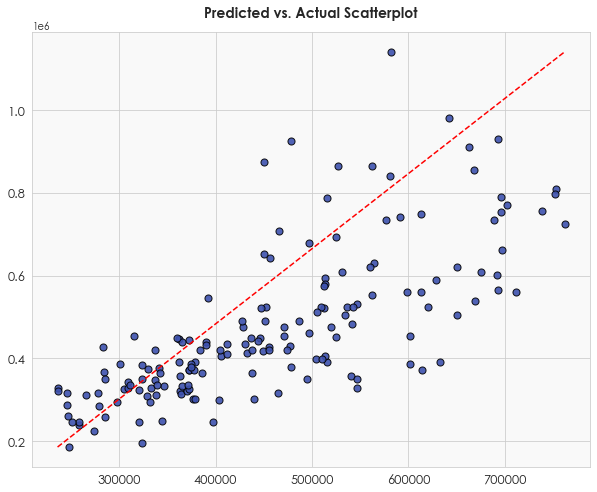

In [265]:
# Plot the scatterplot of R2 Coefficient to Visualise Relationship

# Set the figure size and customise the plot
plt.figure(figsize=(10, 8))
plt.rcParams['font.family'] = 'Century Gothic'

# Plot the predicted and actual line
plt.scatter(rf_predicted, rf_expected, color='#3D51AE', label='Predicted', edgecolor='black', s=50, alpha=0.9)
plt.plot([min(rf_predicted), max(rf_predicted)], [min(rf_expected), max(rf_expected)], color='red', linestyle='--', label='Actual')

# Label and customise the plot features
plt.title('Predicted vs. Actual Scatterplot', y=1.02, fontsize=14, fontweight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.gca().set_facecolor('#F9F9F9')

plt.show()

### ASSESSING THE FEATURE IMPORTANCES OF THE COLUMNS IN THE DATASET
### FEATURE IMPORTANCE OF RANDOM FOREST

- Identify the most important features in the dataset that affects model performance using feature_importances.
- Sort the importances to show the most important feature at the top of the chart.
- From the graph, it is clear that the most important feature is 'House Area (sqm)' : Size of the house in square metres
- This indicates that the size of the house makes a significant contribution to the model's ability to make accurate predictions on the Price ($) for houses.
- However, the level of importance only suggests a moderate rather than a strong relationship. This is evident from the relatively shorter bars in the feature importance chart, indicating a moderate correlation between house area and price.

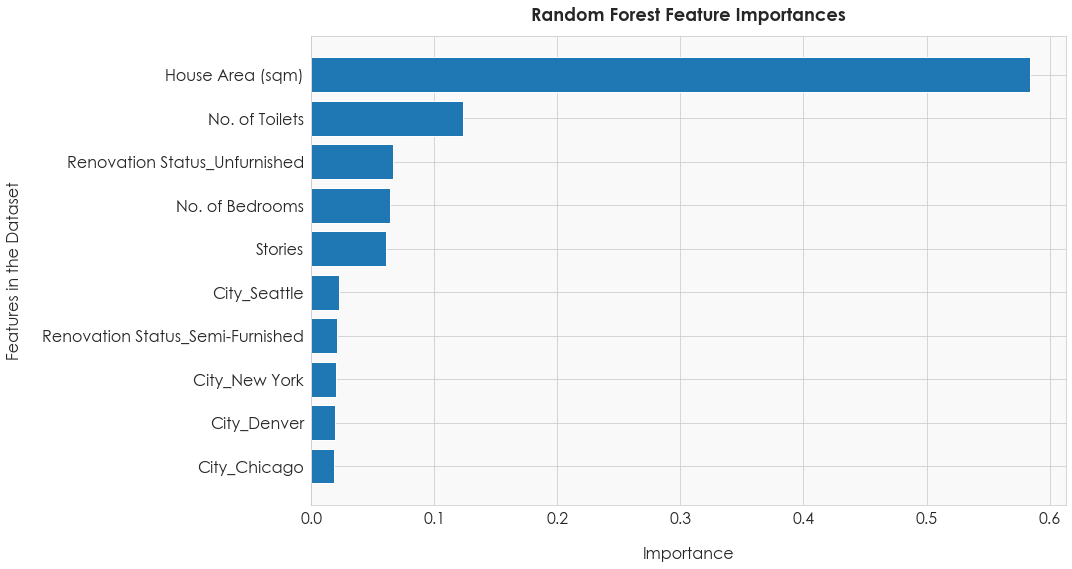

In [297]:
# Feature Selection & Importance for Random Forest

# Create a Random Forest model
rf_model = RandomForestRegressor()

# Fit the model to the training data
rf_model.fit(X_train_scaled, y_train)

# Retrieve the feature importances
importances = rf_model.feature_importances_

# Sort the feature importances in descending order
sorted_indices = np.argsort(importances)[::1]
sorted_features = X_train.columns[sorted_indices]
sorted_importances = importances[sorted_indices]

# Plot the feature importances
plt.figure(figsize=(15, 8))
plt.rcParams['font.family'] = 'Century Gothic'
plt.barh(range(len(sorted_importances)), sorted_importances)

plt.gca().set_facecolor('#F9F9F9')
plt.ylabel('Features in the Dataset', fontsize=16, labelpad=20)
plt.xlabel('Importance', fontsize=16, labelpad=20)
plt.title('Random Forest Feature Importances', fontsize=18, fontweight='bold', y=1.02)
plt.yticks(range(len(sorted_importances)), sorted_features, fontsize=16)
plt.xticks(fontsize=16)

plt.tight_layout()
plt.show()

### EVALUATING THE MODEL'S QUALITY WITH A DUMMY BASELINE
- Compare the model to a dummy baseline using DummyRegressor with the strategy = 'median' to predict the median value of 'Price ($)' observed in the training data for all instances of the test data.
- For the Dummy Regressor, ‘median’ is used as the strategy as it is less affected by outliers compared to mean, providing a prediction that is less sensitive to outliers in the target variable.
- Create a pipeline to scale the data and create the dummy model.
- Fit the pipeline to the training data and predict on the test set.

In [263]:
# Comparing the Model to a Dummy Baseline
dummy_reg = DummyRegressor(strategy="median")

pipeline = Pipeline([("scaler", RobustScaler()), ('dummymodel', dummy_reg)])

# Fit on training data
pipeline.fit(X_train_scaled, y_train)
# Predict on test data
y_pred = pipeline.predict(X_test)
    
# Make the predictions
expected = np.exp(y_test)
predicted = np.exp(y_pred)

# Print the predicted labels
print("Dummy Regressor Evaluation:\n\nPredicted labels:", predicted)

# Evaluate the model
mse = mean_squared_error(expected, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(expected, y_pred)
r2 = r2_score(expected, y_pred)
evs = explained_variance_score(expected, y_pred)

# Print the evaluation metrics
print("\nDummy Baseline Evaluation Metrics:")
print("-----------------------------------")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared Coefficient: {r2:.2f}")
print(f"Explained Variance Score: {evs:.2f}")

Dummy Regressor Evaluation:

Predicted labels: [441000. 441000. 441000. 441000. 441000. 441000. 441000. 441000. 441000.
 441000. 441000. 441000. 441000. 441000. 441000. 441000. 441000. 441000.
 441000. 441000. 441000. 441000. 441000. 441000. 441000. 441000. 441000.
 441000. 441000. 441000. 441000. 441000. 441000. 441000. 441000. 441000.
 441000. 441000. 441000. 441000. 441000. 441000. 441000. 441000. 441000.
 441000. 441000. 441000. 441000. 441000. 441000. 441000. 441000. 441000.
 441000. 441000. 441000. 441000. 441000. 441000. 441000. 441000. 441000.
 441000. 441000. 441000. 441000. 441000. 441000. 441000. 441000. 441000.
 441000. 441000. 441000. 441000. 441000. 441000. 441000. 441000. 441000.
 441000. 441000. 441000. 441000. 441000. 441000. 441000. 441000. 441000.
 441000. 441000. 441000. 441000. 441000. 441000. 441000. 441000. 441000.
 441000. 441000. 441000. 441000. 441000. 441000. 441000. 441000. 441000.
 441000. 441000. 441000. 441000. 441000. 441000. 441000. 441000. 441000.
 441

### CONCLUSION GAINED FROM THE REGRESSION ANALYSIS
- Best-performing model : Random Forest Regressor


- From hyperparameter tuning, the best parameters were : {'criterion': 'absolute_error', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}

- Based on the R2 correlation score of 0.54, the model performed moderately in predicted house prices. However, its performance was negatively impacted by the skew in prices and the weak correlation between the features and target variable.

- However, the Random Forest still made significant improvement in its predictive ability upon tuning, hence was able to achieve a moderate prediction score.